In [1]:
'''Some generic python and jupyter imports'''
import numpy as np
from numpy import pi,sqrt

'''Qiskit imports'''
from qiskit import(
    QuantumCircuit
    , execute
    , Aer
    , ClassicalRegister
    , QuantumRegister
)
backend_svec = Aer.get_backend('statevector_simulator')
backend_qasm = Aer.get_backend('qasm_simulator')

'''Visualizations'''
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

|B0> Circuit:
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     ├───┤
q_5: ┤ X ├
     └───┘

|A0> Circuit:
     ┌───┐┌───────────┐┌────────────┐┌──────────────┐ ┌────────────┐ »
q_0: ┤ H ├┤ P(4.4543) ├┤ P(0.72296) ├┤ P(0.0093634) ├─┤ P(0.41807) ├─»
     ├───┤├───────────┤├────────────┤├──────────────┤ ├────────────┤ »
q_1: ┤ H ├┤ P(4.4543) ├┤ P(0.72296) ├┤ P(0.0093634) ├─┤ P(0.41807) ├─»
     ├───┤├───────────┤├────────────┤├──────────────┤ ├────────────┤ »
q_2: ┤ H ├┤ P(4.4543) ├┤ P(0.72296) ├┤ P(0.0093634) ├─┤ P(0.41807) ├─»
     ├───┤├───────────┤├────────────┤├──────────────┤ ├────────────┤ »
q_3: ┤ H ├┤ P(4.4543) ├┤ P(0.72296) ├┤ P(0.0093634) ├─┤ P(0.41807) ├─»
     ├───┤├───────────┤├────────────┤└────┬───┬─────┘┌┴────────────┴┐»
q_4: ┤ H ├┤ P(4.4543) ├┤ P(0.72296) ├─────┤ X ├──────┤ P(0.0093634) ├»
     ├───┤├───────────┤└───┬───┬────┘ ┌───┴───┴────┐ └────┬───┬─────┘»
q_5: ┤ H ├┤ P(4.4543) ├────┤ X ├──────┤ P(0.722

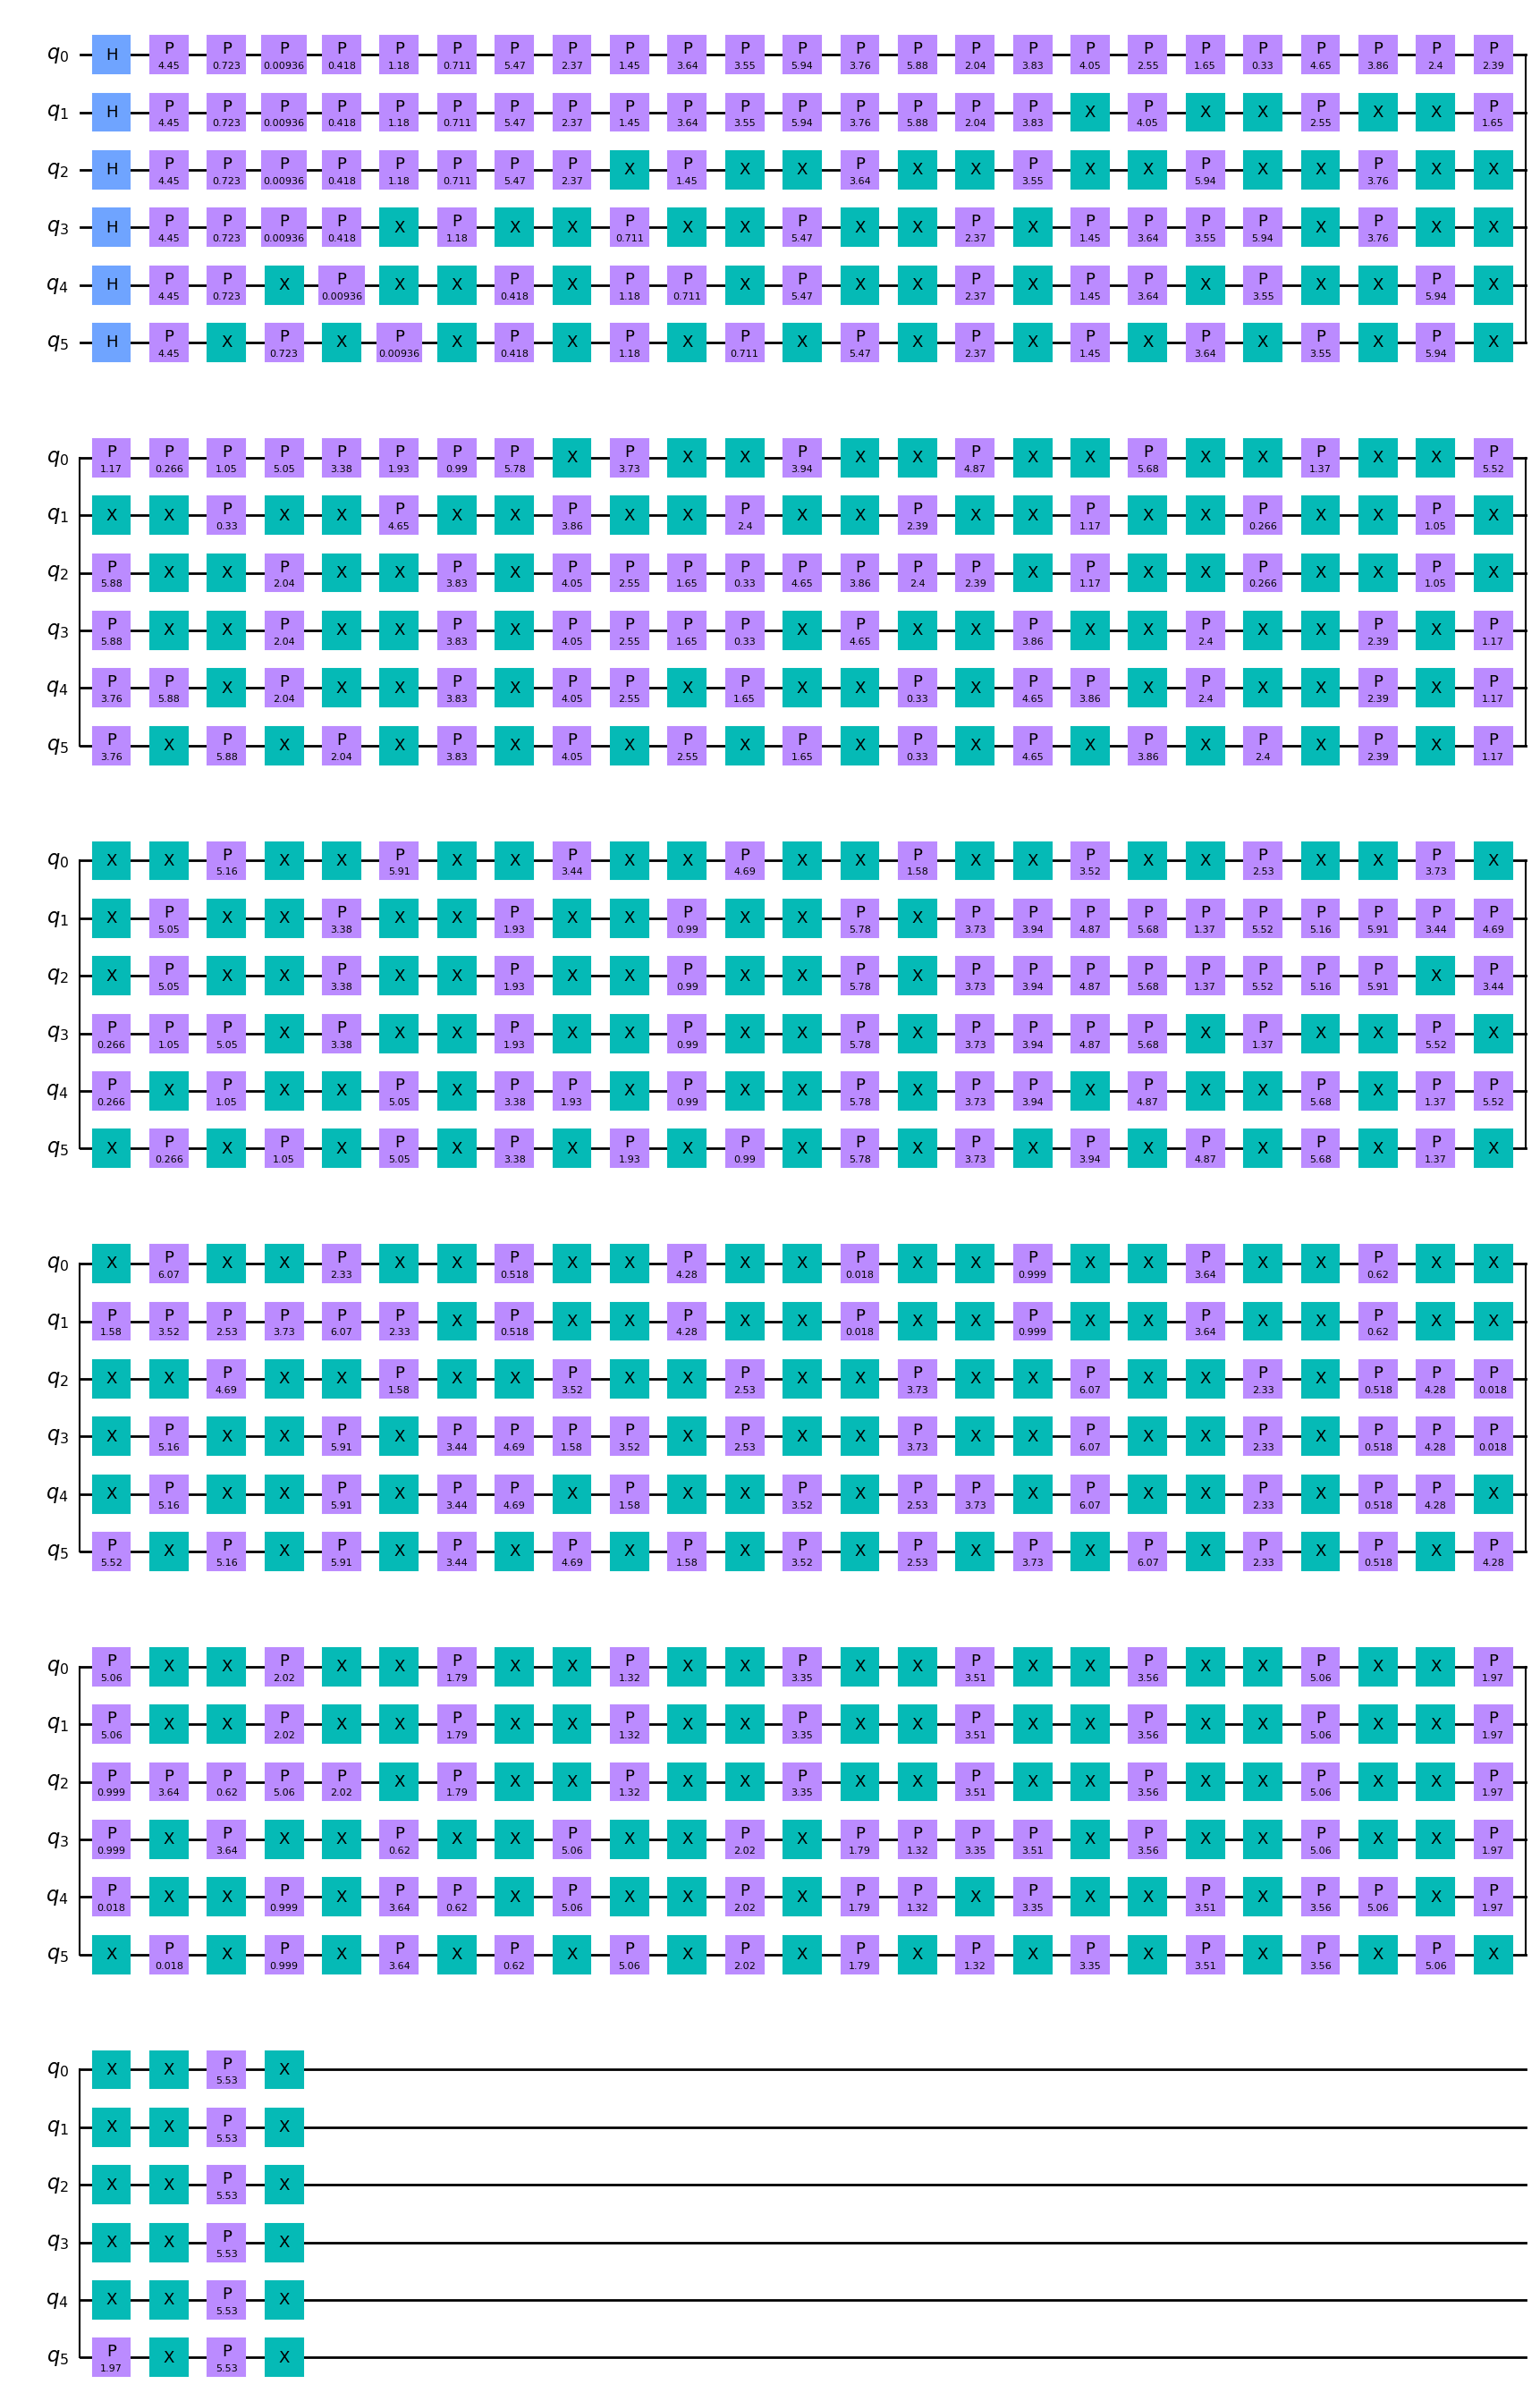

In [2]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

# Define |B0> = |111111>
b0_circuit = QuantumCircuit(6, name='B0')
for qubit in range(6):
    b0_circuit.x(qubit)

# Define |A0>
a0_circuit = QuantumCircuit(6, name='A0')
for qubit in range(6): # Create equal superposition
    a0_circuit.h(qubit)

# Apply random phases
random_phases = np.random.rand(2**6)
for i, phase in enumerate(random_phases):
    binary_state = format(i, f'06b')  # Get binary
    for j, bit in enumerate(binary_state):
        if bit == '1':
            a0_circuit.x(j)  # Flip qubits
    a0_circuit.p(2 * np.pi * phase, range(6))  # Apply phase shift
    for j, bit in enumerate(binary_state):
        if bit == '1':
            a0_circuit.x(j)  # Undo flips

# Display circuits
print("|B0> Circuit:")
print(b0_circuit)

print("\n|A0> Circuit:")
print(a0_circuit)

# Toggle for visualization (a0 or b0)
a0_circuit.draw(output='mpl')


state preparation circuit:


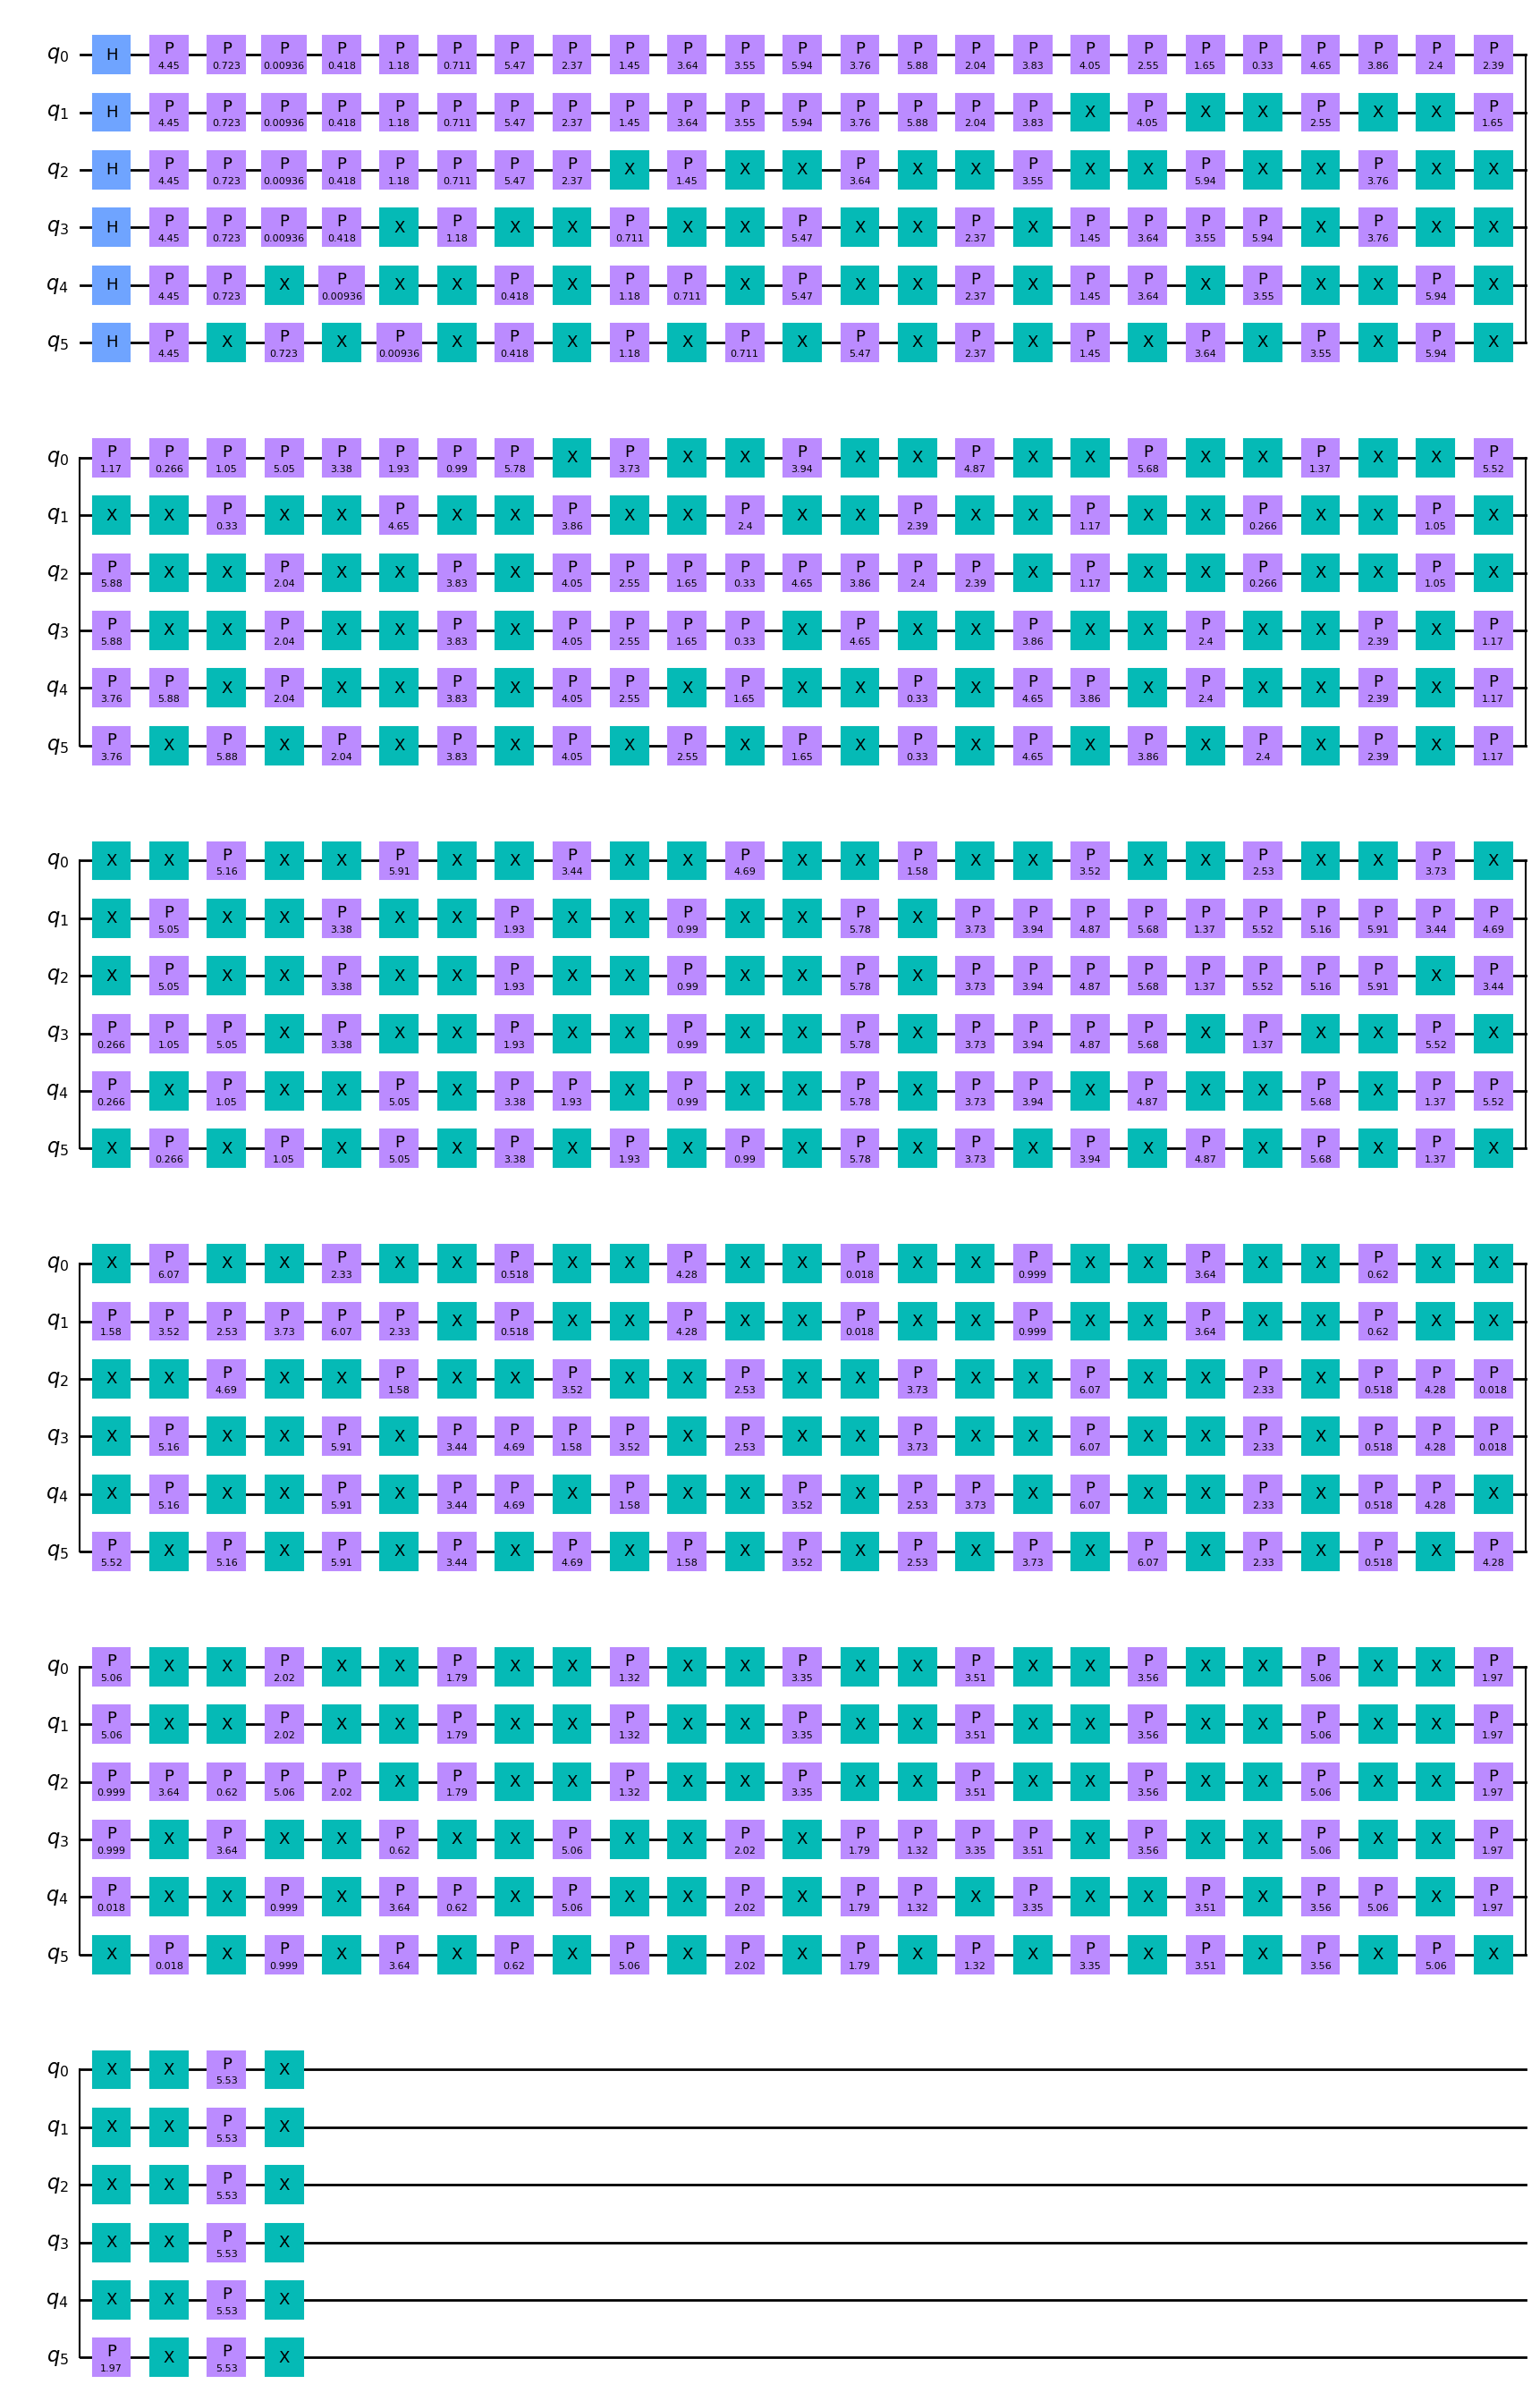

In [ ]:
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem
from qiskit.algorithms import Grover
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector

problem = AmplificationProblem(
    b0_circuit, state_preparation=a0_circuit, is_good_state=["111111"]
)

# state_preparation
print("state preparation circuit:")
problem.grover_operator.state_preparation.draw(output="mpl")

grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)
